In [64]:
import numpy as np
import matplotlib.pyplot as plt

N=1000
num_bins=50

## Semi-circular law as universal spectral limit for Gaussian Hermitian matrices
following Wigner (1958)
$$ \frac{1}{2 \pi} \sqrt{4-x^2} 1_{\{ -2 \leq x \leq 2 \}} dx $$

/home/rchhaibi/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


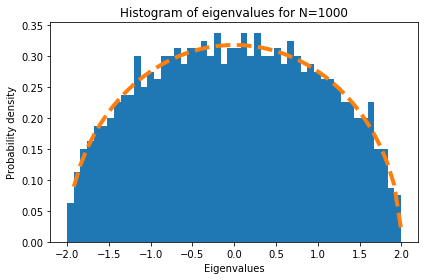

In [65]:
G = np.random.normal( size=(N,N) )
H = (G + G.transpose())/np.sqrt(2)
H = H/np.sqrt(N)
diag, U = np.linalg.eig(H)

# Histogram of spectrum
fig, ax = plt.subplots()
n, bins, patches = ax.hist(diag, num_bins, density=True)
y = np.sqrt( 4 - bins**2)/(2*np.pi)
ax.plot(bins, y, '--', linewidth=4)
ax.set_xlabel('Eigenvalues')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of eigenvalues for N={}'.format(N))
fig.tight_layout()
plt.show()

## Marchenko-Pastur law as universal limit for singular values of Gaussian matrices
following Marchenko and Pastur (1967)
$$ \frac{1}{2 \pi} \frac{\sqrt{(x-l)(r-x)}}{x} dx $$

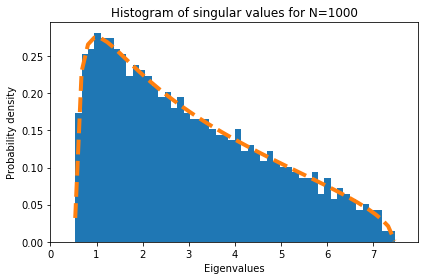

In [66]:
c = 3 # MP scale parameter
r = (1+np.sqrt(c))**2 #Right end
l = (1-np.sqrt(c))**2 #Left end

G = np.random.normal( size=(N,c*N) )
W = G.dot( G.transpose() )
W = W/N
diag, U = np.linalg.eig(W)

# Histogram of singular values
fig, ax = plt.subplots()
n, bins, patches = ax.hist(diag, num_bins, density=True)
y = np.sqrt( (r-bins)*(bins-l) )/(2*np.pi*bins)
ax.plot(bins, y, '--', linewidth=4)
ax.set_xlabel('Eigenvalues')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of singular values for N={}'.format(N))
fig.tight_layout()
plt.xlim(0,r+0.5)
plt.show()

## Free convolution
following Voiculescu (1991)
$$ \frac{1}{\pi} \frac{1}{\sqrt{x(2-x)}} 1_{\{  0 < x < 2 \}} dx $$

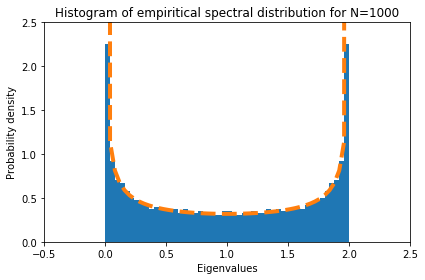

In [63]:
# Bernoulli sample (fake)
A = np.zeros(N)
A[0:int(0.5*N)] = 1
A = np.diag(A)
# Sample unitary
G = np.random.normal( size=(N,N) )
H = (G + G.transpose())/np.sqrt(2)
H = H/np.sqrt(N)
diag, U = np.linalg.eig(H)
# Additive convolution
B = U.dot(A.dot(U.transpose()))
C = A+B

diag, U = np.linalg.eig(C)

num_bins = 50
fig, ax = plt.subplots()
# Histogram of singular values
n, bins, patches = ax.hist(diag, num_bins, density=True)
y = (1/np.pi)/np.sqrt( bins*(2-bins) )
ax.plot(bins, y, '--', linewidth=4)
ax.set_xlabel('Eigenvalues')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of empiritical spectral distribution for N={}'.format(N))
fig.tight_layout()
plt.xlim(-0.5,2.5)
plt.ylim(0, 2.5)
plt.show()